# Numerical Derivatives
## AEP 4380


### Problem Background
<p>The purpose of this assignment is just to familiarize oneself with the programming environment being used. The actual numerical portion is relatively straightforward. One must find the first and second derivative of the following equation using the forward, backward, and central difference methods: <br>

$$f(x) = sin(x)e^{−0.04x^2}$$

The derivative and second derivative should be calculated with step sizes of $h=0.5$ and $h=0.05$ in order to compare all of the methods at different resolutions. <br>

The analytical representation of $\frac{df}{dx}$ and $\frac{d^2f}{dx^2}$ can be found using the chain rule, and then used to verify the accuracy of my results.

$$\frac{d}{dx}(f(x)) = e^{−0.04x^2}(cos(x)-2\times 0.04\times x sin(x) )= e^{−0.04x^2}(cos(x)-(0.08) x sin(x))$$
$$\frac{d^2}{dx^2}(f(x)) = e^{-0.04x^2}(sin(x)(4(0.04)^2x^2-2(0.04)-1)-4(0.04)xcos(x)) = e^{-0.04x^2}((0.0064x^2-1.08)sin(x)-0.16xcos(x)) $$
</p>

In [ ]:
# The usual imports
import matplotlib.pyplot as plt
import numpy as np, scipy as sp
plt.style.use('dark_background') #Don't judge me
plt.rcParams['figure.figsize'] = [20, 10]

In [1]:
# Define the function to be differentiated
def f(x):
    return np.sin(x)*np.exp(-0.04*(x**2))

# The derivative that I expect to calculate numerically
def dfdx(x):
    return np.exp(-0.04*(x**2))*(np.cos(x)-np.sin(x)*0.08*x)

# The second derivative that I expect to calculate numerically
def d2fdx2(x):
    return np.exp(-0.04*(x**2))*(np.sin(x)*(0.0064*(x**2)-1.08)-0.16*x*np.cos(x))

### Solution Description
The discrete derivative is just the difference between two points divided by the interval between them. In the forward difference, the point being evaluated and the next one are used. In the backward difference, the previous point is used instead. The central difference uses the previous and the next point and divides by a larger interval to account for the difference.

$$\frac{d}{dx}(f(x))_{f} = \frac{f(x+h)-f(x)}{h}$$
$$\frac{d}{dx}(f(x))_{b} = \frac{f(x)-f(x-h)}{h}$$
$$\frac{d}{dx}(f(x))_{c} = \frac{f(x+h)-f(x-h)}{2h}$$

<p align="center">
  <img src="img/a1/finite_diff.png" width="400" alt="https://en.wikipedia.org/wiki/File:Finite_difference_method.svg"/>
</p>

The function to be differentiated (`func`), a range on which to evaluate the derivative (`xmin` and `xmax`), the evaluation location step number (`steps`), and evaluation interval size (`h`), must all be provided to the first derivative function. I've designed this function to also accept a desired type of derivative to execute. The evaluated positions, the function evaluated at each step, as well as the derivative at each step, is then returned to the user in that order. It is important to note that this is NOT the difference function typically used for discrete signals. When given an array of time series data, this function will break. It is meant to calculate numerical differences of independent functions which are defined for all or most input values.

In [2]:
def num_deriv(func, xmin, xmax, h, steps, style = "forward"):

    #check for style choice
    style_options = ["forward", "backward", "central"]
    if style not in style_options:
        raise Exception("Please enter an accepted derivative option: %s" %style_options)
    
    #check for xmax>xmin
    if xmax<=xmin:
        raise Exception("Please ensure that xmax is greater than xmin.")
    
    xvals = np.zeros(steps) #container for the x value evaluation locations
    function = np.zeros(steps) #container for the original function value
    deriv = np.zeros(steps) #container for the derivative

    delta = (xmax-xmin)/(steps) #distance between evaluation locations

    #filter for style first, then evaluate
    if style == style_options[2]: #central diff requires larger delta
        for i in range(0, steps):
            xvals[i] = i*delta+xmin #the value being fed to the function call
            function[i] = func(xvals[i]) #the actual function evaluation at x
            func_low = func(xvals[i]-h)
            func_high = func(xvals[i]+h)
            deriv[i] = (func_high-func_low)/(2*h)
    elif style == style_options[1]: #backward difference
        for i in range(0, steps):
            xvals[i] = i*delta+xmin #the value being fed to the function call
            function[i] = func(xvals[i]) #the actual function evaluation at x
            func_low = func(xvals[i]-h)
            func_high = function[i] #save a function call
            deriv[i] = (func_high-func_low)/(h)
    elif style == style_options[0]: #forward difference
        for i in range(0, steps):
            xvals[i] = i*delta+xmin #the value being fed to the function call
            function[i] = func(xvals[i]) #the actual function evaluation at x
            func_low = function[i] #save a function call
            func_high = func(xvals[i]+h) 
            deriv[i] = (func_high-func_low)/(h)
    return xvals, function, deriv

The second derivative is derived similarly to the above, but using one more point for each calculation. Filtering for the style early saves a check for a high number of points, although filtering later can allow for some common calculations to be grouped together to shorten the number of lines. I opted for the former on the first derivative and the latter on the second derivative. Don't ask me why.

For the forward style second derivative:
$$\begin{aligned} 
f^{\prime}_{f}(x) & =\frac{f(x+h)-f(x)}{h} \\
f^{\prime}_{f}(x+h) & =\frac{f(x+2 h)-f(x+h)}{h} \\
f^{\prime \prime}_{f}(x) & =\frac{f^{\prime}(x+h)-f^{\prime}(x)}{h} \\
f^{\prime \prime}_{f}(x) & =\frac{\frac{f(x+2 h)-f(x+h)}{h}-\frac{f(x+h)-f(x)}{h}}{h} \\
f^{\prime \prime}_{f}(x) & =\frac{f(x+2 h)-2 f(x+h)+f(x)}{h^2}\\
\end{aligned}$$

By a similar setup, the backward and central second derivatives:
$$\begin{aligned} 
f^{\prime \prime}_{b}(x) & =\frac{f(x-2 h)-2 f(x-h)+f(x)}{h^2}\\
f^{\prime \prime}_{c}(x) & =\frac{f(x-h)-2 f(x)+f(x+h)}{h^2}\\
\end{aligned}$$

In [3]:
def num_sec_deriv(func, xmin, xmax, h, steps, style = "forward"):

    #check for style choice
    style_options = ["forward", "backward", "central"]
    if style not in style_options:
        raise Exception("Please enter an accepted derivative option: %s" %style_options)
    
    #check for xmax>xmin
    if xmax<=xmin:
        raise Exception("Please ensure that xmax is greater than xmin.")
    
    xvals = np.zeros(steps) #container for the x value evaluation locations
    function = np.zeros(steps) #container for the original function value
    sec_deriv = np.zeros(steps) #container for the derivative

    delta = (xmax-xmin)/(steps) #distance between evaluation locations

    for i in range(0, steps):
        xvals[i] = i*delta+xmin #the value being fed to the function call
        function[i] = func(xvals[i]) #the actual function evaluation at x

        if style == style_options[0]: #forward diff
            func_left = function[i] #save a function call
            func_middle = func(xvals[i]+h) 
            func_right = func(xvals[i]+2*h) 
        elif style == style_options[1]: #backward diff
            func_left = func(xvals[i]-2*h)
            func_middle = func(xvals[i]-h) 
            func_right = function[i] #save a function call
        elif style == style_options[2]: #central diff has the same denominator this time (same interval size)
            func_left = func(xvals[i]-h)
            func_middle = function[i] #save a function call 
            func_right = func(xvals[i]+h)
            
        sec_deriv[i] = (func_right-2*func_middle+func_left)/(h**2)
            
    return xvals, function, sec_deriv

### Results and Interpretation
Below are the first and second derivatives plotting using the analytical solution in comparison to the iteratively calculated approach.

First Derivative

In [4]:
#Settings
xmin = -7
xmax = 7
h = 0.5
steps = 100

#Plot setup
fig, axes = plt.subplots(2)
axis = 0

#forward
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"forward")
axes[axis].plot(xvals,orig)
axes[axis].plot(xvals,deriv)
#backward
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"backward")
axes[axis].plot(xvals,deriv)
#central
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"central")
axes[axis].plot(xvals,deriv)
#actual
axes[axis].plot(xvals,dfdx(xvals)) #actual derivative

l = axes[axis].legend([r'$f(x)$',r'$\frac{df(x)}{dx}_f$',r'$\frac{df(x)}{dx}_b$',r'$\frac{df(x)}{dx}_c$',r'$\frac{df(x)}{dx}$'],loc='upper right',fontsize = "20")
t = axes[axis].set_title("Comparison of the forward, backward, and central derivative methods using $h=0.5$.",fontsize = "20")

#New Settings
h = 0.05
axis = 1

#forward
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"forward")
axes[axis].plot(xvals,orig)
axes[axis].plot(xvals,deriv)
#backward
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"backward")
axes[axis].plot(xvals,deriv)
#central
xvals, orig, deriv = num_deriv(f,xmin,xmax,h,steps,"central")
axes[axis].plot(xvals,deriv)
#actual
axes[axis].plot(xvals,dfdx(xvals)) #actual derivative

l = axes[axis].legend([r'$f(x)$',r'$\frac{df(x)}{dx}_f$',r'$\frac{df(x)}{dx}_b$',r'$\frac{df(x)}{dx}_c$',r'$\frac{df(x)}{dx}$'],loc='upper right',fontsize = "20")
t = axes[axis].set_title("Comparison of the forward, backward, and central derivative methods using $h=0.05$.",fontsize = "20")



NameError: name 'plt' is not defined

While somewhat accurate at $h=0.5$, the accuracy of the derivative is clearly much higher with a 10x smaller step size of $h=0.05$. While a pretty rudimentary exercise, it is important that the resolution of the derivative take into account the most local information possible. The central difference also seems to distribute its error more evenly, so it is more accurate overall, although it has a low-pass effect on the peaks and troughs where it comes out of contact with the real derivative. I can imagine the central difference method having more error/smoothing with higher frequencies in an underlying sampled signal.

Second Derivative

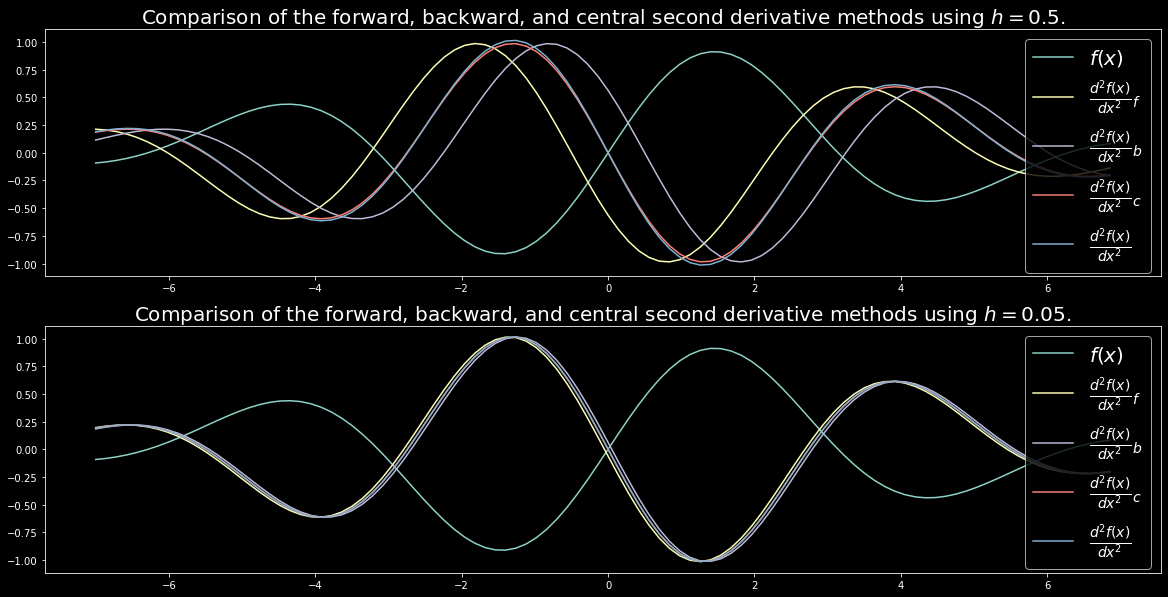

In [ ]:

#Settings
xmin = -7
xmax = 7
h = 0.5
steps = 100

#Plot setup
fig, axes = plt.subplots(2)
axis = 0

#forward
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"forward")
axes[axis].plot(xvals,orig)
axes[axis].plot(xvals,deriv)
#backward
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"backward")
axes[axis].plot(xvals,deriv)
#central
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"central")
axes[axis].plot(xvals,deriv)
#actual
axes[axis].plot(xvals,d2fdx2(xvals)) #actual derivative

l = axes[axis].legend([r'$f(x)$',r'$\frac{d^2f(x)}{dx^2}_f$',r'$\frac{d^2f(x)}{dx^2}_b$',r'$\frac{d^2f(x)}{dx^2}_c$',r'$\frac{d^2f(x)}{dx^2}$'],loc='upper right',fontsize = "20")
t = axes[axis].set_title("Comparison of the forward, backward, and central second derivative methods using $h=0.5$.",fontsize = "20")

#New Settings
h = 0.05
axis = 1

#forward
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"forward")
axes[axis].plot(xvals,orig)
axes[axis].plot(xvals,deriv)
#backward
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"backward")
axes[axis].plot(xvals,deriv)
#central
xvals, orig, deriv = num_sec_deriv(f,xmin,xmax,h,steps,"central")
axes[axis].plot(xvals,deriv)
#actual
axes[axis].plot(xvals,d2fdx2(xvals)) #actual derivative

l = axes[axis].legend([r'$f(x)$',r'$\frac{d^2f(x)}{dx^2}_f$',r'$\frac{d^2f(x)}{dx^2}_b$',r'$\frac{d^2f(x)}{dx^2}_c$',r'$\frac{d^2f(x)}{dx^2}$'],loc='upper right',fontsize = "20")
t = axes[axis].set_title("Comparison of the forward, backward, and central second derivative methods using $h=0.05$.",fontsize = "20")

One draws similar conclusions about the second derivatives. The central style is the most overall accurate and more accurately located zero-crossings which represent inflection points in the original signal.